# Who are Applebee's customers(age, region, gender)?
# What regions are tweeting the most about Applebees?
# What does Applebees tweet about? Applebees twitter page - Word Frequency etc.
# How often does Applebees mention the Drink of the Month? Any other name-specific promotions?
# What dates and times are Applebees tweeting the most. 



No customer insight - other group has 
 Demand insights: ▪ Whenever Applebees is mentioned in a tweet, how often do they mention the Drink of the Month? Any other name-specific promotions? ▪ Can we “predict” future demand from “electronic word-of-mouth” (“buzz”)? ▪ Where is such demand? Region … ▪ Time series analysis of tweets? 

In [87]:
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# import packages 
import csv
import re
import pandas as pd

import nltk
from nltk.corpus import stopwords

from pattern.en import sentiment

In [95]:
openfile = open("data/tcat_applebee2.0.csv", "rb")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()

#remove the extra bracket
reviews = [x for y in reviews for x in y]
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]

#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "rb").read().splitlines()
negative_words = open("data/negative-words.txt", "rb").read().splitlines()

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative"

0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
2 0 2 Positive
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
3 1 2 Positive
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
2 1 1 Positive
1 0 1 P

0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 

0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative


1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
3 2 1 Positive
0 1 -1 Negative
1 2 -1 Negative
1 1 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -

0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative


1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 2 -2 Negative
1 2 -1 Negative
1 3 -2 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
2 0 2 Positive
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
2 1 1 Positive
1 2 -1 Negative
0 1

0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
1 2 -1 Negative
0 0 0 Neutral
2 0 2 Positive
2 3 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 3 -3 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
6 0 6 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
1 2 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 1 0 Neutral
0 2 -2 Negative
2 0 2 Positive
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
2 0 2 Positive
1 2 -1 Negative
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
2 1 1 Positive
1 0 1 Positive
2 0 2 Positive
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
2

0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 1 0 Neutral
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
2 0 2 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
1 3 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
2 0 2 Positive
0 1 -1 Negative
0 0 0 Neutral


0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negativ

1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 N

0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 2 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 4 -3 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 

0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
3 1 2 Positive
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 N

0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neu

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
3 0 3 Positive
0 0 0 Neutral
1 0 1 Positive
3 0 3 Positive
0 1 -1 Negative
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
3 0 3 Positive
0 0 0 Neutral
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutra

0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 1 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative


1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 4 -4 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
3 0 3 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0

1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 

0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutra

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
3 0 3 Positive
0 0 0

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
2 1 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
1 3 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Nega

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
4 1 3 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutra

0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 4 -4 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neu

0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutr

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 

0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 

0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neut

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
3 3 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neut

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0

0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutra

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutr

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neut

0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
3 3 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutra

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
3 1 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
3 1 2 Positive
0 0 0 Neutral
3 1 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 N

0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
3 1 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral


0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
3 0 3 Positive
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neut

1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 

0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neut

0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 4 -3 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
3 0 3 Positive
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutr

0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 4 -2 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 0 1 P

0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
0 2 -2 Negative
0 2 -2 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
3 1 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral


0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 3 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 

1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positi

0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 3 -3 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutr

1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 3 -2 Negative
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 3 -2 Negative
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
1 2 -1 Negative
1 1 0 Neutral
1 3 -2 Negative
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 2 -2 Negative
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Nega

0 1 -1 Negative
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
2 1 1 Positive
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
3 0 3 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 

1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
3 0 3 Positive
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 3 -3 Negative
0 2 -2 Negative
1 1 0 Neutral
1 1 0 Neutral
3 0 3 Positive
0 0 0 Neutral
1 1 0

1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
1 1 0 Neutral
1 1 0 Neutral
0 3 -3 Negative
1 1 0 Neutral
1 1 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 

1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 2 -2 Negative
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neut

1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
2 0 2 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral


1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
2 0 2 Positive
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 4 -3 Negativ

1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 3 -3 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral


1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
2 1 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
2 0 2 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 2 -2 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral


0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 4 -4 Negative
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
2 1 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
2 1 1 Positive
1 1 0 Neutral
1 1 0 Neutral
0 4 -4 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
2 0 2 Positive
1 1 0 Neutral
2 0 2 Positive
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
3 3 0 Neutral
1 1 0 Neutral
1 1 0 N

1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neu

0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1

1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 3 -3 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
2 0 2 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral

1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
2 1 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
2 1 1 Positive
1 0 1 Positive
1 1 0 Neutral
2 1 1 Positive
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 3 -2 Negative
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
2 1 1 Positive
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0

1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1

1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 4 -4 Negative
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1

0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 3 -2 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
2 0 2 Positive
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 2 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 N

1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
2 1 1 Positive
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral

2 0 2 Positive
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
2 4 -2 Negative
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
2 0 2 Positive
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 3 -2 Negative
3 0 3 Positive
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 4 -4 Negative
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 N

0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
2 1 1 Positive
0 4 -4 Negative
2 1 1 Positive
0 4 -4 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 4 -4 Negative
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
0 2 -2 Negative
0 2 -2 Negative
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
2 1 1 Positive
0 1 -1 Negative
0 1 -1 Negative
2 1 1 Positive
0 4 -4 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
2 1 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 4 -4 Negative
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
2 1 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 4 -4 Negative
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
2 1 1 Positive
1 2 -1 Ne

0 1 -1 Negative
2 1 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 1 -1 Negative
2 1 1 Positive
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
1 0 1 Positive
2 1 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 1 0 Neutral
1 3 -2 Negative
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 2 -2 Negative
1 2 -1 Negative
1 1 0 Neutral
0 4 -4 Negative
0 0 0 Neutral
1 1 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
2 1 1 Positive
0 2 -2 Negative
1 1 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
2 1 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral

1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
3 3 0 Neutral
2 1 1 Positive
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 2 -2 Negative
1 0 1 Positive
2 1 1 Positive
1 0 1 Positive
1 1 0 Neutral
2 2 0 Neutral
0 2 -2 Negative
2 0 2 Positive
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral

0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
2 1 1 Positive
0 1 -1 Negative
0 1 -1 Negative
3 4 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
3 0 3 Positive
0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
3 0 3 Positive
0 0 0 Neutral
4 1 3 Positive
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutr

1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 2 -2 Negative
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1

1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 4 -4 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 15 -15 Negative
1 1 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
3 1 2 Positive
0 0 0 Neutral
1 3 -2 Negative
0 2 -2 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1

0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
3 3 0 Neutral
1 0 1 Positive
0 0 0 Neutral
3 0 3 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
0 3 -3 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
3 0 3 Positive
2 1 1 Positive
1 0 1 Positive
1 3 -2 Negative
0 1 -1 Negative
0 

0 0 0 Neutral
1 0 1 Positive
2 1 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
3 1 2 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
1 1 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 

1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1

1 0 1 Positive
2 2 0 Neutral
2 1 1 Positive
0 1 -1 Negative
1 0 1 Positive
2 1 1 Positive
3 0 3 Positive
1 1 0 Neutral
1 0 1 Positive
2 0 2 Positive
3 0 3 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
2 0 2 Positive
2 0 2 Positive
0 1 -1 Negative
1 0 1 Positive
3 1 2 Positive
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 1 1 Positive
0 1 -1 Negative
2 0 2 Positive
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 0 1 Positive
2 0 2 Positive
0 4 -4 Negative
0 4 -4 Negative
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
3 0 3 Positive
1 0 1 Positive
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 

0 1 -1 Negative
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
2 0 2 Positive
1 3 -2 Negative
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
2 2 0 Neutral
1 0 1 Positive
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
2 1 1 Positive


0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
2 0 2 Positive
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
2 1 1 Positive
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
3 0 3 Positive
0 0 0 Neutral
3 1 2 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
2 0 2 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
1 2 -1 Negative
2 0 2 Positive
2 0 2 Positive
0 0 0 Neu

0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 0 1 Positive
1 2 -1 Negative
0 1 -1 Negative
0 4 -4 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
2 1 1 Positive
0 0 0 Neutral
1 4 -3 Negative
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
4 1 3 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
3 0 3 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
0 1 -1 Negative
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral

0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
1 1 0 Neutral
0 0 0 Neutral
2 1 1 Positive
2 0 2 Positive
0 0 0 Neutral
3 1 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
3 0 3 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
4 0 4 Positive
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 1 -1 Negative
0 5 -5 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0

0 2 -2 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
2 2 0 Neutral
0 2 -2 Negative
0 2 -2 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 2 -2 Negative
1 0 1 Positive
0 1 -1 Negative
0 3 -3 Negative
3 1 2 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 4 -4 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 2 -2 Negative
1 0 1 Positive
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
0 2 -2 Negative
0 2 -2 Negative
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 2 -2 Negative
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
2

0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 2 -2 Negative
0 1 -1 Negative
1 0 1 Positive
1 2 -1 Negative
0 0 0 Neutral
2 3 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
0 2 -2 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
3 0 3 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
1 0 1 Positive
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 2 -2 Negative
0 2 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
0 1 -1 Negativ

1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
0 2 -2 Negative
0 3 -3 Negative
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
3 2 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 4 -2 Negative
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 4 -4 Negative
0 0 0 Neutral
1 3 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutr

1 4 -3 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
1 8 -7 Negative
0 0 0 Neutral
0 1 -1 Negative
1 8 -7 Negative
0 1 -1 Negative
1 1 0 Neutral
0 6 -6 Negative
0 1 -1 Negative
0 2 -2 Negative
3 2 1 Positive
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
3 0 3 Positive
5 0 5 Positive
1 1 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
1 3 -2 Negative
1 1 0 Neutral
0 0 0 Neutral
3 0 3 Positive
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
2 1 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
5 0 5 Positive
7 0 7 Positive
0 0 0 Neutral
1 3 -2 Negative
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
2 3 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 2 -

2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 2 -1 Negative
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive


2 0 2 Positive
2 0 2 Positive
1 2 -1 Negative
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 1 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
7 0 7 Positive
1 0 1 Positive
0 3 -3 Negative
1 0 1 Positive
2 0 2 Positive
1 1 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 1 0 Neutral
2 0 2 Positive
1 1 0 Neutral
0 0 0 Neutral
3 2 1 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
0 1 -1 Negative
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive

1 2 -1 Negative
0 1 -1 Negative
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 1 0 Neutral
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
1 2 -1 Negative
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
1 1 0 Neutral
2 0 2 Positive
1 2 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 2 -2 Negative
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
0 0 0 Neutral
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 1 -1 Negative
2 0 2 Positive
2 0 2 Positive
1 3 -2 Negative
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 3 -2 Negative
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 2 -2 Negative
2 0 2 Positive
2 0 2 Posi

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
2 0 2 Positive
2 8 -6 Negative
2 2 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
2 1 1 Positive
0 3 -3 Negative
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 1 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
0 3 -3 Negative
0 1 -1 Negative
2 0 2 Positive
2 0 2 Positive
1 1 0 Neutral
2 0 2 Positive
1 2 -1 Negative
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
7 1 6 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
2 0 2 Positive
2 2 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
2 0 2 Positive
4 3 1 Positive
2 0 2 Positive
1 1 0 Neutral
2 0 2 Positive
0 2 -2 Negative
0 1 -1 Negative
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
1 1 0 Neutral
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative


2 0 2 Positive
0 1 -1 Negative
2 0 2 Positive
0 2 -2 Negative
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
2 0 2 Positive
2 0 2 Positive
0 1 -1 Negative
1 3 -2 Negative
2 0 2 Positive
2 1 1 Positive
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
0 1 -1 Negative
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 3 -2 Negative
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
1 1 0 Neutral
2 0 2 Positive
0 1 -1 Negative
2 0 2 Positive
2 0 2 Positive
2 1 1 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
0 3 -3 Negative
2 0 2 Positiv

1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
3 0 3 Positive
3 0 3 Positive
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
3 0 3 Positive
3 0 3 Positive
3 2 1 Positive
3 0 3 Positive
3 0 3 Positive
3 0 3 Positive
0 1 -1 Negative
3 0 3 Positive
0 0 0 Neutral
3 0 3 Positive
3 0 3 Positive
0 0 0 Neutral
2 0 2 Positive
3 0 3 Positive
3 0 3 Positive
1 0 1 Positive
0 0 0 Neutral
3 0 3 Positive
3 0 3 Positive
3 0 3 Positive
3 0 3 Positive
3 0 3 Positive
3 0 3 Positive
3 0 3 Positive
3 0 3 Positive
1 0 1 Positive
3 0 3 Positive
2 0 2 Positive
0 1 -1 Negative
3 0 3 Positive
0 1 -1 Negative
0 1 -1 Negative
3 0 3 Positive
3 0 3 Positive
2 0 2 Positive
3 0 3 Positive
0 1 -1 Negative
0 0 0 Neutral
2 1 1 Positive
1 0 1 Positive
2 0 2 Positive
3 0 3 Positive
2 0 2 Positive
3 0 3 Positive
2 0 2 Positive
1 1 0 Neutral
1 0 1 Positive
1 3 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive

0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
1 0 1 Positive
3 0 3 Positive
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
3 0 3 Positive
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 3 -3 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
3 0 3 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
2 2 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
2 0 2 Positive
2 2 0 Neutral
0 0 0 Neutral
0 1 -1 

0 0 0 Neutral
0 0 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
2 3 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
3 0 3 Positive
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 2 0 Neutral
3 0 3 Positive
1 3 -2 Negative
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 2 -2 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
2 1 1 Positive
2 0 2 Positive
0 0 0 Neutral
0 3 -3 Negative
0 0 0 Neutral
0 2 -2 Negative
0 3 -3 Negative
0 0 0 Neutral
1 1 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
4 0 4 Positive
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
2 0 2 Positive
2 0 2 Positive
0 1 -1 Negative
0 4 -4 Negative
3 2 1 Positive
2 0 2 Positive
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
3 1 2 Positive
0 1 -1 Negative
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
2 2 0 Neutral
1 0 1 Positive
2 1 1 Positive
0 3 -3 N

0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
2 1 1 Positive
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 3 -3 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1

1 0 1 Positive
3 0 3 Positive
0 0 0 Neutral
0 2 -2 Negative
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
3 0 3 Positive
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutra

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 1 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
3 0 3 Positive
2 0 2 Positive
1 2 -1 Negative
0 0 0 Neutral
0 3 -3 Negative
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
1 0 1 Positive
3 0 3 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 3 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
4 0 4 Positive
0 1 -1 Negative
2 0 2 Positive
1 2 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
1 0 1 Positive
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative

1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
2 3 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative


0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
3 0 3 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
2 0 2 Positive
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negat

0 0 0 Neutral
1 0 1 Positive
3 1 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 3 -2 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
3 1 2 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 0

1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 5 -4 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
2 1 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 2 -2 Negative
1 0 1 Positive
2 1 1 Positive
2 0 2 Positive
1 0 1 Positive
1 2 -1 Negative
0 1 -1 Negative
2 0 2 Positive
2 1 1 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Posi

0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
0 1 -1 Negative
3 0 3 Positive
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 3 -3 Negative
1 1 0 Neutral
0 3 -3 Negative
1 0 1 Positive
0 3 -3 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 3 -3 Negative
1 0 1 Positive
1 0 1 Positive
0 3 -3 Negative
0 3 -3 Negative
0 0 0 Neutral
0 0 0 Neutral
3 0 3 Positive
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
0 3 -3 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 3 -3 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Po

0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
3 0 3 Positive
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
2 3 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 2 -1 Negative
3 0 3 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
1 1 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 3 -3 N

2 2 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
2 2 0 Neutral
1 2 -1 Negative
2 2 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
2 2 0 Neutral
1 2 -1 Negative
2 2 0 Neutral
1 2 -1 Negative
2 2 0 Neutral
2 2 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
1 2 -1 Negative
2 2 0 Neutral
2 2 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
2 1 1 Positive
2 0 2 Positive
1 2 -1 Negative
1 2 -1 Negative
2 2 0 Neutral
1 2 -1 Negative
2 2 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Positive
2 2 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
1 0 1 Positive
2 2 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
2 2 0 Neutral
1 1 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
2 2 0

0 0 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
1 0 1 Positive
1 5 -4 Negative
0 1 -1 Negative
1 0 1 Positive
1 2 -1 Negative
1 1 0 Neutral
2 0 2 Positive
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 1 0 Neutral
2 2 0 Neutral
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
1 3 -2 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
2 2 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
2 2 0 Neutral
1 2 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
3 1 2 Positive
1 1 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neu

0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
1 2 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
2 0 2 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
2 3 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
1 2 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
2 1 1 Positive
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
2 2 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 2 -

3 2 1 Positive
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
3 3 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
0 2 -2 Negative
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
2 0 2 Positive
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
2 1 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 2 -2 Negative
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
3 1 2 Positive
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutra

0 0 0 Neutral
1 0 1 Positive
0 2 -2 Negative
1 0 1 Positive
1 1 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 2 -2 Negative
0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
0 2 -2 Negative
1 0 1 Positive
1 0 1 Positive
0 2 -2 Negative
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
3 3 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 2 -2 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 

1 0 1 Positive
1 0 1 Positive
1 4 -3 Negative
1 0 1 Positive
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
4 0 4 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 2 -2 Negative
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive

1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 1 1 Positive
1 3 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
4 0 4 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 P

0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
1 1 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 

0 1 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
2 0 2 Positive
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
3 0 3 Positive
0 1 -1 Negative
0 1 -1 Negative
2 0 2 Positive
0 1 -1 Negative
2 3 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 1 1 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
0 1 -1 Negative
2 0 2 Positive
2 0 2 Positive
2 3 -1 Negative
2 0 2 Positive
2 0 2 Positive
0 1 -1 Negative
2 0 2 Positive
2 0 2 Positive
2 0 2 

1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 2 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 1 1 Positive
2 1 1 Positive
2 1 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
1 0 1 Positive
1

1 0 1 Positive
0 3 -3 Negative
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
0 1 -1 Negative
1 0 1 Positive
0 2 -2 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 4 -3 Negative
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
0 3 -3 Negative
0 3 -3 Negative
0 0 0 Neutral
0 3 -3 Negative
0 0 0 Neutral
0 3 -3 Negative
0 1 -1 Negative
2 1 1 Positive
1 3 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
2 2 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Po

1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 6 -4 Negative
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 3 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 2 -2 Negative
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0

0 0 0 Neutral
2 1 1 Positive
3 1 2 Positive
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
1 3 -2 Negative
1 3 -2 Negative
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
0 2 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
2 0 2 Positive
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neut

1 0 1 Positive
0 2 -2 Negative
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
0 3 -3 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
1 0 1 Positive
3 0 3 Positive
0 1 -1 Negative
2 0 2 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 2 -2 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
1 1 

2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 2 -1 Negative
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 1 0 Neutral
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
0 2 -2 Negative
2 0 2 Positive
1 0 1 Positive
1 1 0 Neutral
1 2 -1 Negative
1 0 1 Positive
2 0 2 Positive
1 2 -1 Negative
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
1 2 -1 Negativ

1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
0 3 -3 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 1 1 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Pos

1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 2 -1 Negative
2 0 2 Positive
1 1 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
2 0 2 Positive
0 2 -2 Negative
2 0 2 Positive
1 1 0 Neutral
3 1 2 Positive
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
2 0 2 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
3 1 2 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
2 2 0 Neutral
0 0 0 Neutral
0 0 0 Ne

1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 2 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
0 2 -2 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 2 -2 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
3 0 3 Positive
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 3 -3 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Neg

1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
2 0 2 Positive
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
3 0 3 Positive
0 1 -1 Negative
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
2 0 2 Positive
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
2 0 2 Positive
1 1 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
2 2 0 Neu

0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
2 1 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
1 0 1 Positive
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
1 2 -1 Negative
1 2 -1 Negat

0 1 -1 Negative
1 2 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
2 2 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 2 -2 Negative
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
2 1 1 Positive
4 0 4 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
1 3 -2 Negative
4 0 4 Positive
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 2 -1 Negative
2 1 1 Positive
0 0 0 Neutral
0 1 -1 Negative
1 2 -1 Negative


1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
1 2 -1 Negative
0 0 0 Neutral
0 2 -2 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 1 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
1 1 0 Neutral
0 1 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
1

1 1 0 Neutral
0 3 -3 Negative
2 0 2 Positive
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 2 -1 Negative
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 3 -3 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 0 1 Positive
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 2 -2 Negative
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Ne

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
2 2 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
2 3 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Pos

1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 1 0 Neutral
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
1 1 0 Neutral
1 1 0 Neutral
2 0 2 Positive
1 2 -1 Negative
2 0 2 Positive
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
1 0 1 Positive
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
2 0 2 Positive
2 0 2 Positive
2 0 2 Positive
1 0 1 Positive
1 1 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
1 1 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
1 0 1 P

In [96]:
# finding the amount of each review 
positive_review = []
negative_review = []
neutral_review = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)
        
print len(positive_review)
print len(negative_review)
print len(neutral_review)

18818
18682
57044


In [97]:
len(reviews)

94544

In [102]:
# remove common words 
stoplist = stopwords.words('english')
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['retweet','comment','https'])
stoplist = set(stoplist) | more 
texts = [[word for word in text if word not in stoplist] for text in positive_review]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

# remove extra brackets
cleaned_positive_review_tokens = [x for y in texts for x in y]
cleaned_positive_review_tokens

# word frequency on positive reviews
positive_review_wordcounts= Counter(cleaned_positive_review_tokens)
positive_review_wordcounts.most_common(20)

[('applebee', 12301),
 ('like', 9354),
 ('applebees', 7971),
 ('ihop', 7664),
 ('get', 7511),
 ('mcdonalds', 7305),
 ('designationsix', 7268),
 ('redlobster', 7262),
 ('walmart', 6830),
 ('goldencorral', 5806),
 ('foxnews', 5595),
 ('tagged', 4732),
 ('mypillowusa', 4532),
 ('sponsors', 4063),
 ('rubytuesday', 3688),
 ('notifications', 3618),
 ('idahopotato', 3611),
 ('omahasteaks', 3257),
 ('duluthtradingco', 3209),
 ('tide', 3143)]

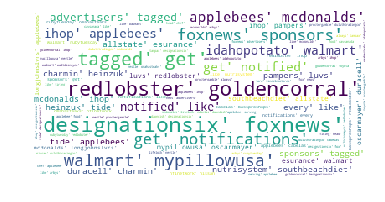

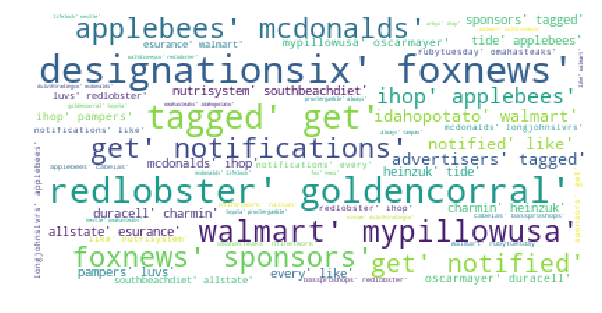

In [103]:
# word cloud for positive reviews 
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_positive_review_tokens) 

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=2000).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("data/pos.png")
plt.savefig("data/pos.pdf")

In [106]:
# remove extra brackets)
negative_review_tokens = [x for y in positive_review for x in y]

# count words in list
from collections import Counter
negative_review_wordcounts= Counter(negative_review_tokens)
negative_review_wordcounts.most_common()

# remove common words 
stoplist = stopwords.words('english')
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['https','nzhk','raxqzhqi','fucking'])
stoplist = set(stoplist) | more 
texts = [[word for word in text if word not in stoplist] for text in negative_review]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

# remove extra brackets
cleaned_negative_review_tokens = [x for y in texts for x in y]
cleaned_negative_review_tokens

# word frequency on negative reviews
negative_review_wordcounts= Counter(cleaned_negative_review_tokens)
negative_review_wordcounts.most_common(20)

[('applebee', 18826),
 ('would', 3899),
 ('alone', 3774),
 ('come', 3342),
 ('protesters', 3277),
 ('kind', 3244),
 ('dining', 3232),
 ('graham', 3229),
 ('lindsey', 3219),
 ('heckle', 3213),
 ('wishes', 3211),
 ('theonion', 2565),
 ('zombie', 2062),
 ('time', 1683),
 ('yeah', 1484),
 ('eating', 1281),
 ('never', 1235),
 ('damn', 1223),
 ('like', 1200),
 ('wings', 1112)]

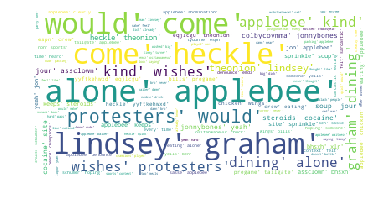

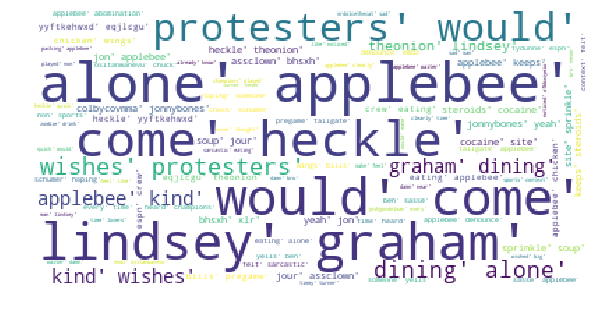

In [107]:
# Word cloud for negative reviews 
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_negative_review_tokens) 

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=2000).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("data/pos.png")
plt.savefig("data/pos.pdf")

In [108]:
# Pattern Sentiment Analysis
reviews = []
openfile = open("data/tcat_applebee2.0.csv", "rb")
r = csv.reader(openfile)
for i in r:
    reviews.append(i)  
openfile.close()
reviews

positive_review = []
negative_review = []
neutral_review = []

for row in reviews:
    tweet = row[0]
    score = sentiment(tweet)
    if score[0] > 0:
        positive_review.append(reviews)
    elif score[0] == 0:
        neutral_review.append(reviews)
    else:
        negative_review.append(reviews)
        
print len(positive_review)
print len(negative_review)
print len(neutral_review)

C:\Users\Evan Schmidtberger\Downloads\ANACONDA\lib\site-packages\pattern\text\__init__.py:1943: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if w in imap(lambda e: e.lower(), e):
C:\Users\Evan Schmidtberger\Downloads\ANACONDA\lib\site-packages\pattern\text\__init__.py:979: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  and tokens[j] in ("'", "\"", u"”", u"’", "...", ".", "!", "?", ")", EOS):


17606
11108
65830


In [110]:
review = []
openfile = open('data/tcat_applebee2.0.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

#converting to string
tokens = str(review)
#lowercases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
# more stopwords to remove
more_stopwords = set(('years', 'used', 'also','year','see','like','hours','report','permalink','get','ago','abuse'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
# Bi-grams
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi

FreqDist({('date', 'sebgorka'): 1,
          ('photo', 'john'): 1,
          ('soap', 'retweet'): 2,
          ('tweet', 'alexistiptonva'): 1,
          ('wyynjxapro', 'shaybonvi'): 1,
          ('hit', 'menus'): 4,
          ('night', 'therese'): 2,
          ('bitch', 'win'): 2,
          ('seating', 'system'): 1,
          ('cms', 'levine'): 2,
          ('suck', 'massive'): 1,
          ('vomit', 'https'): 3,
          ('late', 'omg'): 1,
          ('subway', 'closed'): 1,
          ('chuckling', 'want'): 1,
          ('somewhat', 'normal'): 1,
          ('skrimps', 'top'): 1,
          ('imagine', 'donald'): 9,
          ('attention', 'females'): 1,
          ('route', 'applebee'): 1,
          ('car', 'accident'): 1,
          ('kathylucasfilm', 'filmgrouch'): 1,
          ('money', 'since'): 1,
          ('unlimited', 'applebees'): 1,
          ('benshapiro', 'good'): 1,
          ('pittsburg', 'kansas'): 1,
          ('applebee', 'eagle'): 1,
          ('applebee', 'mighty'): 1

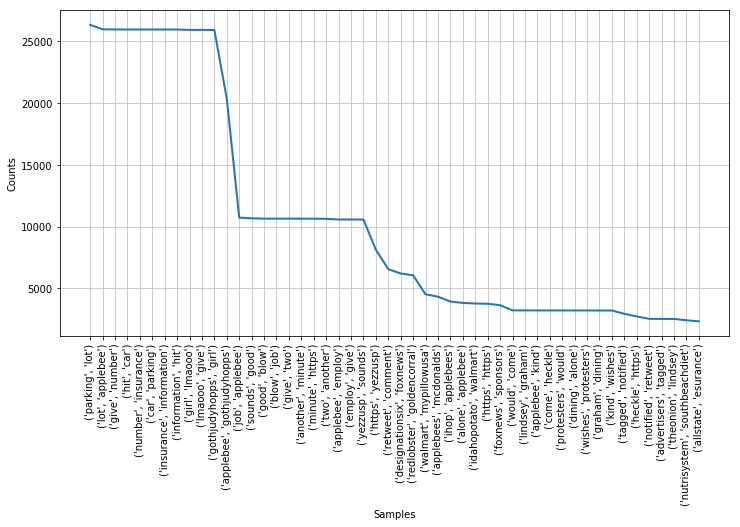

In [111]:
# plot word frequency using bigram
plt.figure(figsize=(12,6))
fdist_bi.plot(50)

In [130]:
openfile = open("data/tcat_applebee1.0.csv", "rb")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()

#remove the extra bracket
reviews = [x for y in reviews for x in y]
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]

#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "rb").read().splitlines()
negative_words = open("data/negative-words.txt", "rb").read().splitlines()

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative"

0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
1 1 0 Neutral
2 1 1 Positive
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
0 1 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
4 0 4 Positive

In [123]:
# finding the amount of each review 
positive_review = []
negative_review = []
neutral_review = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)
        
print len(positive_review)
print len(negative_review)
print len(neutral_review)

97
46
321


In [124]:
len(reviews)

464

In [138]:
#converting to string
tokens = str(reviews)
#lowercases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['https','jeddah','que','fucking'])
stoplist = set(stoplist) | more 
texts = [[word for word in text if word not in stoplist] for text in negative_review]

# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
# word frequency 
fdist = nltk.FreqDist(tokens)
fdist
fdist.most_common(50)

[('applebee', 484),
 ('https', 467),
 ('grill', 296),
 ('bar', 295),
 ('applebees', 52),
 ('dinner', 33),
 ('zombie', 30),
 ('night', 24),
 ('jeddah', 24),
 ('neighborhood', 22),
 ('time', 15),
 ('drinks', 15),
 ('halloween', 15),
 ('lunch', 15),
 ('que', 14),
 ('posted', 14),
 ('drink', 14),
 ('photo', 13),
 ('family', 13),
 ('good', 13),
 ('great', 13),
 ('got', 12),
 ('zombies', 12),
 ('dollar', 11),
 ('tonight', 11),
 ('today', 10),
 ('birthday', 10),
 ('get', 10),
 ('last', 10),
 ('houstontx', 10),
 ('like', 10),
 ('love', 9),
 ('one', 9),
 ('food', 9),
 ('fundraiser', 9),
 ('makkah', 8),
 ('cheers', 8),
 ('back', 8),
 ('day', 8),
 ('new', 7),
 ('boo', 7),
 ('see', 7),
 ('happy', 7),
 ('know', 7),
 ('getting', 7),
 ('naim', 6),
 ('hawally', 6),
 ('steak', 6),
 ('thanks', 6),
 ('support', 6)]

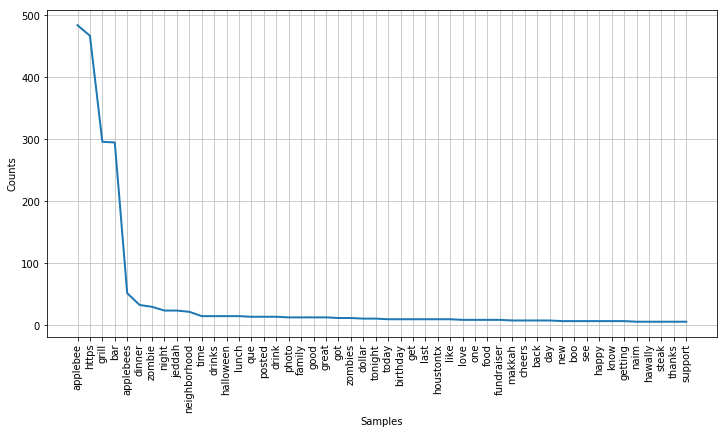

In [132]:
plt.figure(figsize=(12,6))
fdist.plot(50)

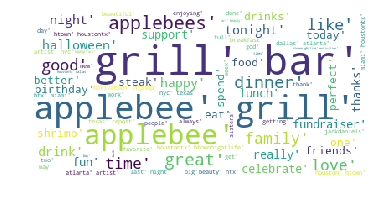

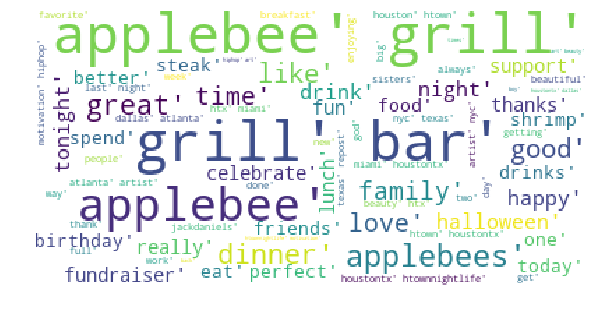

In [116]:
# word cloud for positive reviews 
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_positive_review_tokens) 

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=2000).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("data/pos.png")
plt.savefig("data/pos.pdf")

In [139]:
#converting to string
tokens = str(reviews)
#lowercases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['https','jeddah','que','fucking'])
stoplist = set(stoplist) | more 
texts = [[word for word in text if word not in stoplist] for text in negative_review]

# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
# word frequency 
fdist = nltk.FreqDist(tokens)
fdist
fdist.most_common(50)

[('applebee', 484),
 ('https', 467),
 ('grill', 296),
 ('bar', 295),
 ('applebees', 52),
 ('dinner', 33),
 ('zombie', 30),
 ('night', 24),
 ('jeddah', 24),
 ('neighborhood', 22),
 ('time', 15),
 ('drinks', 15),
 ('halloween', 15),
 ('lunch', 15),
 ('que', 14),
 ('posted', 14),
 ('drink', 14),
 ('photo', 13),
 ('family', 13),
 ('good', 13),
 ('great', 13),
 ('got', 12),
 ('zombies', 12),
 ('dollar', 11),
 ('tonight', 11),
 ('today', 10),
 ('birthday', 10),
 ('get', 10),
 ('last', 10),
 ('houstontx', 10),
 ('like', 10),
 ('love', 9),
 ('one', 9),
 ('food', 9),
 ('fundraiser', 9),
 ('makkah', 8),
 ('cheers', 8),
 ('back', 8),
 ('day', 8),
 ('new', 7),
 ('boo', 7),
 ('see', 7),
 ('happy', 7),
 ('know', 7),
 ('getting', 7),
 ('naim', 6),
 ('hawally', 6),
 ('steak', 6),
 ('thanks', 6),
 ('support', 6)]

In [117]:
# remove extra brackets)
negative_review_tokens = [x for y in positive_review for x in y]

# count words in list
from collections import Counter
negative_review_wordcounts= Counter(negative_review_tokens)
negative_review_wordcounts.most_common()

# remove common words 
stoplist = stopwords.words('english')
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['https','nzhk','raxqzhqi','fucking'])
stoplist = set(stoplist) | more 
texts = [[word for word in text if word not in stoplist] for text in negative_review]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

# remove extra brackets
cleaned_negative_review_tokens = [x for y in texts for x in y]
cleaned_negative_review_tokens

# word frequency on negative reviews
negative_review_wordcounts= Counter(cleaned_negative_review_tokens)
negative_review_wordcounts.most_common(20)

[('applebee', 50),
 ('grill', 41),
 ('bar', 41),
 ('zombie', 19),
 ('applebees', 7),
 ('night', 5),
 ('drinks', 5),
 ('lunch', 4),
 ('got', 4),
 ('dollar', 3),
 ('slow', 3),
 ('halloween', 3),
 ('day', 3),
 ('drink', 3),
 ('today', 3),
 ('brains', 3),
 ('flapjack', 2),
 ('dubai', 2),
 ('trap', 2),
 ('zombies', 2)]

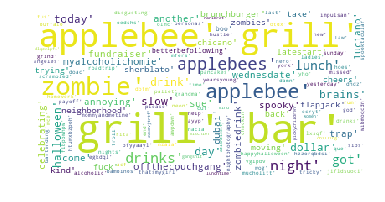

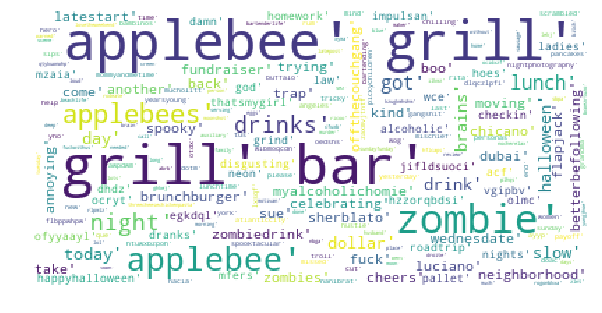

In [118]:
# Word cloud for negative reviews 
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_negative_review_tokens) 

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=2000).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("data/pos.png")
plt.savefig("data/pos.pdf")

In [119]:
# Pattern Sentiment Analysis
reviews = []
openfile = open("data/tcat_applebee1.0.csv", "rb")
r = csv.reader(openfile)
for i in r:
    reviews.append(i)  
openfile.close()
reviews

positive_review = []
negative_review = []
neutral_review = []

for row in reviews:
    tweet = row[0]
    score = sentiment(tweet)
    if score[0] > 0:
        positive_review.append(reviews)
    elif score[0] == 0:
        neutral_review.append(reviews)
    else:
        negative_review.append(reviews)
        
print len(positive_review)
print len(negative_review)
print len(neutral_review)

114
27
323
